In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("bikecounts_reg.csv")
df.head()

,hood,volume,peak_hour,road_primary,road_secondary,road_tertiary,floor,landuse_residential,landuse_parks,metro_station,bus_station,LUM,number_of_schools,number_of_colleges,number_of_intersection,pop_percent_female,pop_under_age15,pop_above_age65,time,date
0,0,239,1,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,11.9226,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,8,1
1,0,60,0,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,11.9226,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,14,1
2,0,23,0,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,11.9226,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,11,8
3,0,267,1,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,11.9226,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,18,8
4,1,124,1,0.738002,3.23526,2.71876,17,0.415129,0.012700,1,17.2960,0.262185,6,0.0,0.118,0.491440,0.066955,0.130528,8,1


# Transforming Variables

In [59]:
df['volume_sqrt'] = np.sqrt(df['volume'])
df.head()

,hood,volume,peak_hour,road_primary,road_secondary,road_tertiary,floor,landuse_residential,landuse_parks,metro_station,...,LUM,number_of_schools,number_of_colleges,number_of_intersection,pop_percent_female,pop_under_age15,pop_above_age65,time,date,volume_sqrt
0,0,239,1,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,...,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,8,1,15.459625
1,0,60,0,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,...,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,14,1,7.745967
2,0,23,0,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,...,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,11,8,4.795832
3,0,267,1,2.487360,3.00518,1.64307,21,0.292108,0.016096,5,...,0.328019,15,0.0,0.485,0.514648,0.080044,0.139291,18,8,16.340135
4,1,124,1,0.738002,3.23526,2.71876,17,0.415129,0.012700,1,...,0.262185,6,0.0,0.118,0.491440,0.066955,0.130528,8,1,11.135529


In [60]:
df['landuse_parks_sqrt'] = np.sqrt(df['landuse_parks'])
df['bus_station_sqrt'] = np.sqrt(df['bus_station'])
df['number_of_intersection_sqrt'] = np.sqrt(df['number_of_intersection'])
df['pop_above_age65_transf'] = np.sqrt(df['pop_above_age65'])
df['road_primary_sqrt'] = np.sqrt(df['road_primary'])
df['road_secondary_sqrt'] = np.sqrt(df['road_secondary'])
df['road_tertiary_sqrt'] = np.sqrt(df['road_tertiary'])
df['metro_station_sqrt'] = np.sqrt(df['metro_station'])
df['number_of_colleges_sqrt'] = np.sqrt(df['number_of_colleges'])

# Regression

In [61]:
#Split by 80-20
from sklearn import model_selection

X = df[['peak_hour','road_primary_sqrt','road_secondary_sqrt','road_tertiary_sqrt','landuse_residential','landuse_parks_sqrt',
             'bus_station_sqrt','LUM',
             'number_of_intersection_sqrt','pop_under_age15','pop_percent_female','pop_above_age65_transf']]
y = df['volume_sqrt']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
#Fitting the model to the Training dataset
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#Getting coefficients
coeff_df = pd.DataFrame(regressor.coef_)  
print(regressor.intercept_)
regressor.coef_

31.65118268019329


array([  4.76314231,   1.0376155 ,   1.10086015,   1.19987486,
        12.32698715,   3.87298992,  -0.70743622,  14.06629314,
        -0.86448974, -88.67132631, -61.13385792,   4.78851784])

In [64]:
#Using the model to predict training and test data sets 
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [65]:
#Reversing the transformation for predictions
y_pred_train_sq = np.square(y_pred_train)
y_pred_test_sq = np.square(y_pred_test)

In [66]:
#Reversing the transformation for dependent variable
y_test_sq = np.square(y_test)
y_train_sq = np.square(y_train)

In [67]:
#Comparing actual and predicted values
df = pd.DataFrame({'Actual': y_test_sq, 'Predicted': y_pred_test_sq})
df1 = df.head(25)
df1

,Actual,Predicted
67,356.0,200.558632
146,44.0,63.020822
322,51.0,68.560433
250,15.0,7.330193
223,195.0,148.584495
366,10.0,2.503256
380,105.0,118.350189
427,72.0,82.897788
436,148.0,117.985759
92,35.0,68.519253


Text(0.5, 1.0, 'Residual plot')

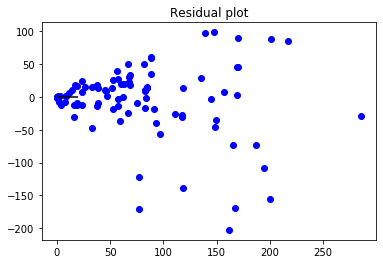

In [68]:
#residual plot
res_plot = plt.scatter(y_pred_test_sq, (y_pred_test_sq - y_test_sq), c='b')
plt.hlines(y=0, xmin= 0, xmax=20)
plt.title('Residual plot')
#plt.savefig('resLinear.png')

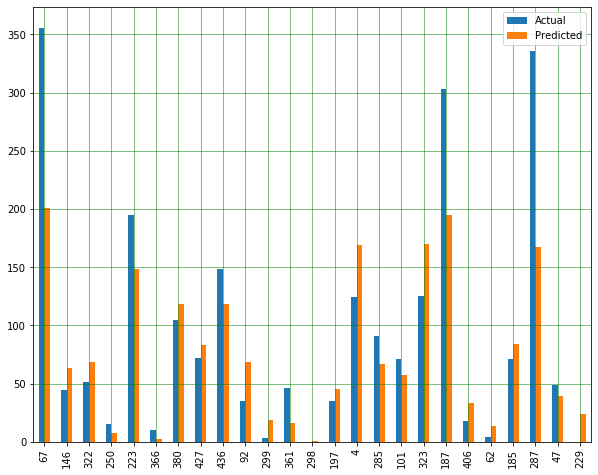

Text(0, 0.5, 'Predicted values for y')

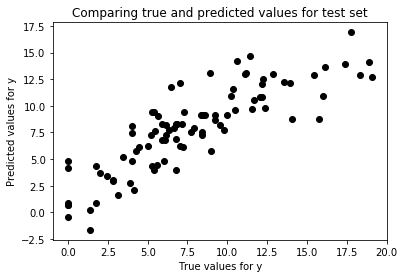

In [69]:
#Bar plot comparing actual vs. predicted values

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
#plt.savefig('volLinear.png')

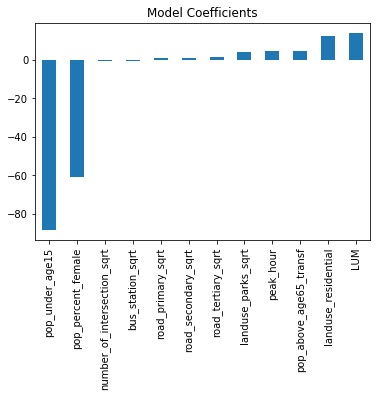

In [70]:
#Coefficient magnitude
predictors = X_train.columns
coef = pd.Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

In [71]:
#Error Metrics
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', "%.3f" %metrics.mean_absolute_error(y_test_sq, y_pred_test_sq))  
print('Mean Squared Error:', "%.3f" %metrics.mean_squared_error(y_test_sq, y_pred_test_sq))  
print('Root Mean Squared Error:', "%.3f" %np.sqrt(metrics.mean_squared_error(y_test_sq, y_pred_test_sq)))
print('R-squared = %.4f' % r2_score(y_test_sq, y_pred_test_sq))

Mean Absolute Error: 34.462
Mean Squared Error: 2926.557
Root Mean Squared Error: 54.098
R-squared = 0.6154


In [72]:
#Shows coefficients and train / test error
columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']

values = [ 'LR', np.sqrt(mean_squared_error(y_train_sq, y_pred_train_sq)), 
           np.sqrt(mean_squared_error(y_test_sq, y_pred_test_sq)),
           np.absolute(regressor.coef_[0]).sum() + np.absolute(regressor.intercept_)]

results = pd.DataFrame([values], columns=columns, index=['Linear'])
results

,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,53.872459,54.09766,36.414325


# Ridge Regression

In [88]:
from sklearn import linear_model

ridge = linear_model.RidgeCV(cv=5,alphas=[0.01,0.03,.05,.07,.1])
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

y_pred_train_ridge_sq = np.square(y_pred_train_ridge)
y_pred_test_ridge_sq = np.square(y_pred_test_ridge)

values3 = [ 'Ridge', np.sqrt(mean_squared_error(y_train_sq, y_pred_train_ridge_sq)), 
           np.sqrt(mean_squared_error(y_test_sq, y_pred_test_ridge_sq)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_)]
print("Selected alpha = %.2f" % ridge.alpha_)

ridge_results = pd.DataFrame([values3], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

Selected alpha = 0.01


,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,53.872459,54.097660,36.414325
RidgeCV,Ridge,53.949410,53.913052,29.544072


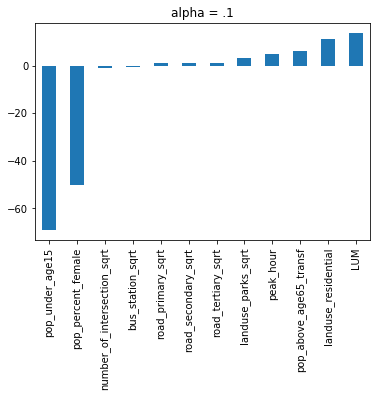

In [74]:
#Showing magnitudes again
predictors = X_train.columns
coef = pd.Series(ridge.coef_, predictors).sort_values()
coef.plot(kind='bar', title='alpha = .1')

In [75]:
df2 = pd.DataFrame({'Actual': y_test_sq, 'Predicted': y_pred_test_ridge_sq})
df3 = df.head(25)
df3

,Actual,Predicted
67,356.0,200.558632
146,44.0,63.020822
322,51.0,68.560433
250,15.0,7.330193
223,195.0,148.584495
366,10.0,2.503256
380,105.0,118.350189
427,72.0,82.897788
436,148.0,117.985759
92,35.0,68.519253


# Lasso Regression and Overall Results

In [76]:
lasso = linear_model.LassoCV(cv=5, max_iter = 100000, alphas=[0.01,0.03,0.05,0.07,0.1])
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

y_pred_train_lasso_sq = np.square(y_pred_train_lasso)
y_pred_test_lasso_sq = np.square(y_pred_test_lasso)

values4 = [ 'Lasso', np.sqrt(mean_squared_error(y_train_sq, y_pred_train_lasso_sq)), 
           np.sqrt(mean_squared_error(y_test_sq, y_pred_test_lasso_sq)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]
print("Selected alpha = %.2f" % lasso.alpha_)

lasso_results = pd.DataFrame([values4], columns=columns, index=['LassoCV'])
pd.concat([results, ridge_results, lasso_results])

Selected alpha = 0.01


,Model,Train error,Test error,Sum of Absolute Weights
Linear,LR,53.872459,54.097660,36.414325
RidgeCV,Ridge,53.949410,53.913052,29.544072
LassoCV,Lasso,56.761023,56.983973,7.837646


In [77]:
print('R-squared = %.4f' % r2_score(y_train_sq, y_pred_train_sq))
print('R-squared = %.4f' % r2_score(y_train_sq, y_pred_train_ridge_sq))
print('R-squared = %.4f' % r2_score(y_train_sq, y_pred_train_lasso_sq))

print('R-squared = %.4f' % r2_score(y_test_sq, y_pred_test_sq))
print('R-squared = %.4f' % r2_score(y_test_sq, y_pred_test_ridge_sq))
print('R-squared = %.4f' % r2_score(y_test_sq, y_pred_test_lasso_sq))

R-squared = 0.6026
R-squared = 0.6015
R-squared = 0.5588
R-squared = 0.6154
R-squared = 0.6180
R-squared = 0.5733


In [89]:
coeff_all = pd.DataFrame({'linear':regressor.coef_,'ridge':ridge.coef_,'lasso':lasso.coef_})
coeff_all = coeff_all.sort_values(by = 'linear').round(3)

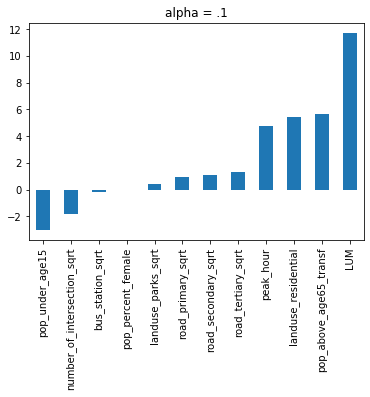

In [79]:
#LASSO coefficients plot
predictors = X_train.columns
coef = pd.Series(lasso.coef_, predictors).sort_values()
coef.plot(kind='bar', title ='alpha = .1')

In [80]:
df4 = pd.DataFrame({'Actual': y_test_sq, 'Predicted': y_pred_test_lasso_sq})
df5 = df.head(25)
df5

,Actual,Predicted
67,356.0,200.558632
146,44.0,63.020822
322,51.0,68.560433
250,15.0,7.330193
223,195.0,148.584495
366,10.0,2.503256
380,105.0,118.350189
427,72.0,82.897788
436,148.0,117.985759
92,35.0,68.519253


# Plots

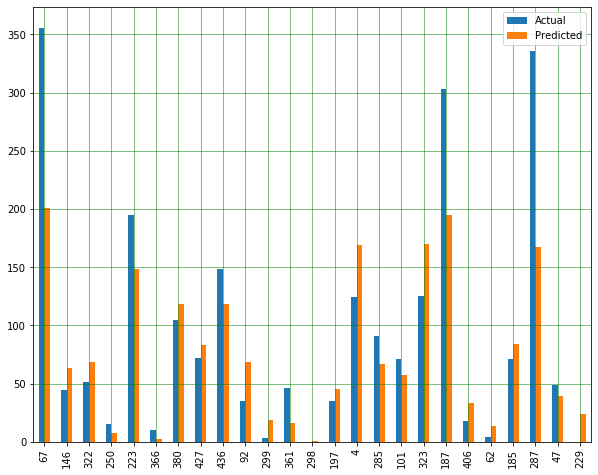

Text(0, 0.5, 'Predicted values for y')

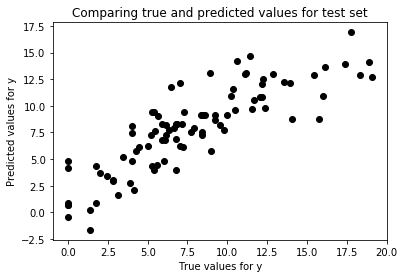

In [81]:
#Ridge Plot
df3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
#plt.savefig('volRidge.png')

Text(0.5, 1.0, 'Residual plot')

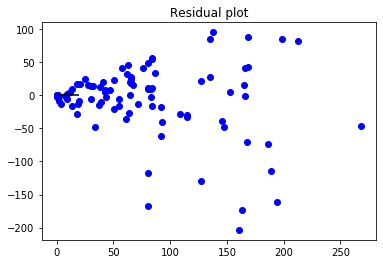

In [82]:
#Ridge Residual
res_plot2 = plt.scatter(y_pred_test_ridge_sq, (y_pred_test_ridge_sq - y_test_sq), c='b')
plt.hlines(y=0, xmin= 0, xmax=20)
plt.title('Residual plot')
#plt.savefig('resRidge.png')

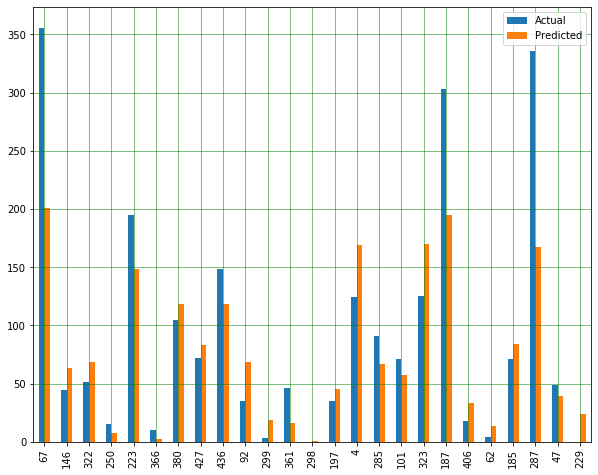

Text(0, 0.5, 'Predicted values for y')

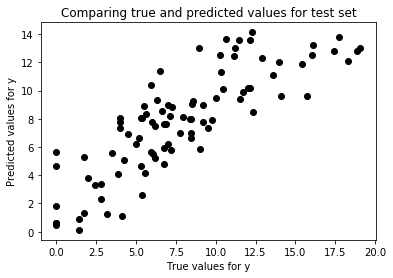

In [83]:
#LASSO Plot
df5.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test_lasso, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
#plt.savefig('volLasso.png')

Text(0.5, 1.0, 'Residual plot')

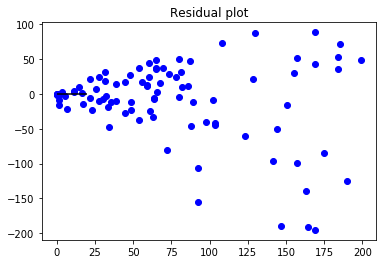

In [84]:
#lasso residuals
res_plot2 = plt.scatter(y_pred_test_lasso_sq, (y_pred_test_lasso_sq - y_test_sq), c='b')
plt.hlines(y=0, xmin= 0, xmax=20)
plt.title('Residual plot')
#plt.savefig('resLasso.png')